In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython

## Import electricity data

In [2]:
# Import Electricity Map data
data = pd.read_csv("..\data\ElectricityMap_DE_2021.csv", sep=",")
data.head()

,datetime,created_at,updated_at,timestamp,zone_name,carbon_intensity_avg,carbon_intensity_direct_avg,carbon_intensity_production_avg,carbon_intensity_discharge_avg,carbon_intensity_import_avg,...,latest_forecasted_power_net_import_DK-DK2_avg,latest_forecasted_power_net_import_FR_avg,latest_forecasted_power_net_import_LU_avg,latest_forecasted_power_net_import_NL_avg,latest_forecasted_power_net_import_NO-NO2_avg,latest_forecasted_power_net_import_PL_avg,latest_forecasted_power_net_import_SE_avg,latest_forecasted_power_net_import_SE-SE4_avg,latest_forecasted_production_solar_avg,latest_forecasted_production_wind_avg
0,2021-01-01 00:00:00+00:00,2022-02-04T16:55:11.373028+00:00,2022-05-05T04:30:19.892325+00:00,1609459200,DE,399.14,326.26,422.72,297.23,248.13,...,462.0,-2295.0,-354.0,-2066.0,0.0,0.0,615.0,615.0,0.0,4304.0
1,2021-01-01 01:00:00+00:00,2022-02-04T16:49:58.284222+00:00,2022-05-05T04:29:32.707800+00:00,1609462800,DE,403.49,330.21,429.22,297.23,236.19,...,705.0,-3251.0,-348.0,-1958.0,0.0,1.0,615.0,615.0,0.0,3816.0
2,2021-01-01 02:00:00+00:00,2022-02-04T16:49:58.102721+00:00,2022-05-05T04:33:13.941494+00:00,1609466400,DE,410.76,337.13,437.14,NaN,242.25,...,719.0,-1753.0,-347.0,-2012.0,0.0,0.0,615.0,615.0,0.0,3373.0
3,2021-01-01 03:00:00+00:00,2022-02-04T16:49:58.101622+00:00,2022-05-05T04:33:20.275036+00:00,1609470000,DE,411.12,337.50,440.14,NaN,237.18,...,720.0,-218.0,-348.0,-1940.0,0.0,0.0,615.0,615.0,0.0,3092.0
4,2021-01-01 04:00:00+00:00,2022-02-04T16:49:58.778849+00:00,2022-05-05T04:29:32.707800+00:00,1609473600,DE,419.15,344.72,445.90,NaN,247.18,...,718.0,-1383.0,-352.0,-2275.0,0.0,0.0,615.0,615.0,0.0,2843.0


In [8]:
# Print types of columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.dtypes)

datetime                                          object
created_at                                        object
updated_at                                        object
timestamp                                          int64
zone_name                                         object
carbon_intensity_avg                             float64
carbon_intensity_direct_avg                      float64
carbon_intensity_production_avg                  float64
carbon_intensity_discharge_avg                   float64
carbon_intensity_import_avg                      float64
total_production_avg                             float64
total_storage_avg                                float64
total_discharge_avg                              float64
total_import_avg                                 float64
total_export_avg                                 float64
total_consumption_avg                            float64
production_sources                                object
power_origin_percent_fossil_avg

In [148]:
# Convert datetime column type
data["datetime"] = pd.to_datetime(data["datetime"], infer_datetime_format=True)
date_time = data["datetime"]
# Series that contains UNIX time in seconds
timestamp_s = data["timestamp"]

In [133]:
# Is datetime in UTC? -> Does timestamp match with datetime?
timestamp1 = data["datetime"].apply(pd.Timestamp.timestamp)
timestamp2 = data["timestamp"].astype(float)

timestamp1.equals(timestamp2)

True

No time zone correction of datetime necessary.

## Extract relevant data

In [137]:
# extract the relevant data
df = pd.DataFrame(data, columns=["datetime", "power_production_wind_avg", "power_production_solar_avg"])
df = df.rename(columns={"power_production_wind_avg": "wind", "power_production_solar_avg": "solar"})
df.head()

,datetime,wind,solar
0,2021-01-01 00:00:00+00:00,4006.75,0.0
1,2021-01-01 01:00:00+00:00,3573.75,0.0
2,2021-01-01 02:00:00+00:00,3145.25,0.0
3,2021-01-01 03:00:00+00:00,2828.50,0.0
4,2021-01-01 04:00:00+00:00,2608.75,0.0


## Plot data

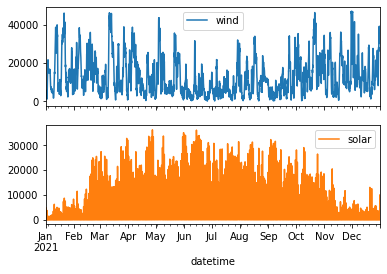

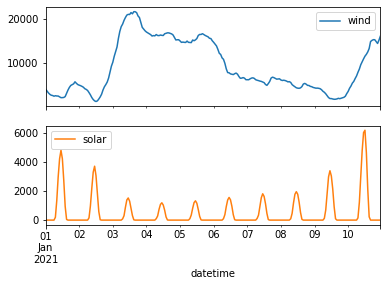

In [135]:
# plot whole year
plot_features = df.copy()
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

# plot first 10 days
plot_features = df[:240].copy()
plot_features.index = date_time[:240]
_ = plot_features.plot(subplots=True)

## Create periodical time signals

In [149]:
day_s = 24*60*60
year_s = (365.2425)*day_s

df["day_sin"] = np.sin(timestamp_s * (2 * np.pi / day_s))
df["day_cos"] = np.cos(timestamp_s * (2 * np.pi / day_s))
df["year_sin"] = np.sin(timestamp_s * (2 * np.pi / year_s))
df["year_cos"] = np.cos(timestamp_s * (2 * np.pi / year_s))

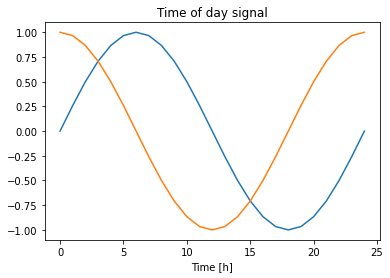

In [151]:
# plotting a day
plt.plot(np.array(df["day_sin"])[:25])
plt.plot(np.array(df["day_cos"])[:25])
plt.xlabel('Time [h]')
_ = plt.title('Time of day signal')